## Fune-tune the System - Decision Tree Classifier

#### 0. Import modules and define parameters

In [1]:
import sys
sys.path.append("..")

from module.utils import general_utils
from module.utils import data_prepare_utils
import module.utils.bin_class_utils as bin_class_utils
from sklearn.pipeline import Pipeline
import numpy as np
import pickle
import pandas as pd
import time

In [2]:
start_time = time.time()

In [3]:
TRAIN_FILE_PATH = "../data/train_df.csv"
VALIDATION_FILE_PATH = "../data/validation_df.csv"

TARGET_ATTR = "label"
TARGET_TYPE = "binary"

ESTIMATOR_NAME = "DecisionTreeClassifier"

SAMPLE_SIZE = 0.05 # set a small number for development, set 1.0 for formal train
SAMPLE_RANDOM_STATE = 24
TARGET_ENCODING_RANDOM_STATE = 42
MODEL_RANDOM_STATE = 42
PERMUTATION_IMPORTANCE_RANDOM_STATE = 0

ATTRS_TO_DROP = ['dev_id',
 'up_life_duration',
 'inter_type_cd',
 'app_score',
 'uid',
 'city_rank',
 'tags',
 'task_id',
 'app_first_class',
 'city',
 'emui_dev',
 'his_on_shelf_time',
 'gender',
 'consume_purchase',
 'spread_app_id']

CVS_SCORING_LIST = ['accuracy', 'precision', 'recall', 'f1']
PERMUTATION_SCORING_LIST = ['average_precision', 'roc_auc']

DT_HYPER_PARAM_GRID = {
    'preprocessor__numerical__imputer__strategy': ['mean', 'median'], # default 'mean'
    'preprocessor__categorical__target_encoder__smooth': ['auto'], # default 'auto'
    'estimator__criterion': ['gini', 'entropy'], # default 'gini'
    'estimator__max_depth': [10, None], # default None
    'estimator__min_samples_split': [2, 5], # default 2
    'estimator__min_samples_leaf': [1, 5], # default 1
    'estimator__max_features': ['sqrt', 'log2', None], # default None
    'estimator__splitter': ['best', 'random'], # default 'best'
}

BS_SAMPLE_NUM = 10

#### 1. Import data and identify attributes

In [4]:
train_df = general_utils.read_csv(TRAIN_FILE_PATH)


Read CSV file ../data/train_df.csv into DataFrame:
df.head(): 


,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,...,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
0,1920544,3854,3367,7,207,17,5,11,13,37,...,4,20,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,17,6,0
1,1850503,3903,6370,7,173,52,5,12,69,11,...,2,-1,-1,-1,2,5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^...,12,50,7,0
2,2157496,1847,6428,6,178,17,5,18,70,39,...,7,20,1,-1,9,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,36,7,0
3,2072043,4125,4468,7,168,37,5,12,44,40,...,2,20,-1,-1,2,6^7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,11,17,6,0
4,1084626,4811,3326,7,183,29,5,12,86,37,...,3,18,-1,-1,2,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,17,6,0


df.shape: (670513, 36)


In [5]:
train_df_sample = data_prepare_utils.sample_data(train_df, SAMPLE_SIZE, SAMPLE_RANDOM_STATE)
del train_df


Sample 0.05 fraction from DataFrame:
sample_df.shape: (33525, 36)


In [6]:
train_cap_x_df, train_y_df = train_df_sample.drop(columns=TARGET_ATTR), train_df_sample[[TARGET_ATTR]]

In [7]:
numerical_attr_list = []
categorical_attr_list = [attr for attr in train_cap_x_df.columns if attr not in numerical_attr_list and attr != TARGET_ATTR]
attr_list = numerical_attr_list + categorical_attr_list

#### 2. Build composite estimator

In [8]:
preprocessor = bin_class_utils.build_preprocessing_pipeline(numerical_attr_list, categorical_attr_list, ATTRS_TO_DROP, TARGET_TYPE, TARGET_ENCODING_RANDOM_STATE)

estimator = bin_class_utils.get_default_model(ESTIMATOR_NAME, MODEL_RANDOM_STATE)

composite_estimator = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    ('estimator', estimator)
])

composite_estimator

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('column_dropper',
                                                                   DropColumnsTransformer(attrs_to_drop=['dev_id',
                                                                                                         'up_life_duration',
                                                                                                         'inter_type_cd',
                                                                                                         'app_score',
                                                                                                         'uid',
                                                                                                         'city_rank',
                                                                                                         'tags',
                                                                                                         'task_id',
                                                                                                         'app_first_class',
                                                                                                         'city',
                                                                                                         'emui_dev',
                                                                                                         'his_on_shelf_time',
                                                                                                         'gender',
                                                                                                         'consume_purchase',
                                                                                                         'spread_app_id'])),
                                                                  ('imput...
                                                   'city', 'city_rank',
                                                   'device_name', 'device_size',
                                                   'career', 'gender',
                                                   'net_type', 'residence',
                                                   'his_app_size',
                                                   'his_on_shelf_time',
                                                   'app_score', 'emui_dev',
                                                   'list_time', 'device_price',
                                                   'up_life_duration',
                                                   'up_membership_grade',
                                                   'membership_life_duration', ...])])),
                ('estimator',
                 DecisionTreeClassifier(class_weight='balanced',
                                        criterion='log_loss',
                                        random_state=42))])

#### 3. Design grid search and tune hyperparameters of composite estimator

In [9]:
best_model = bin_class_utils.tune_hyperparameters(train_cap_x_df, train_y_df, composite_estimator, DT_HYPER_PARAM_GRID)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best estimator hyper parameters:
 {'estimator__criterion': 'gini', 'estimator__max_depth': 10, 'estimator__max_features': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__splitter': 'random', 'preprocessor__categorical__target_encoder__smooth': 'auto', 'preprocessor__numerical__imputer__strategy': 'mean'}


#### 4. Evaluate hyperparameter-tuned estimator on train set

Evaluate the trained estimator performance on train set
Check accuracy score
train set accuracy score: 0.6444444444444445

Check classification report
{'0': {'precision': 0.9863020214030915, 'recall': 0.6406438258827891, 'f1-score': 0.7767539423905307, 'support': 32369.0}, '1': {'precision': 0.06944, 'recall': 0.7508650519031141, 'f1-score': 0.1271236086701816, 'support': 1156.0}, 'accuracy': 0.6444444444444445, 'macro avg': {'precision': 0.5278710107015457, 'recall': 0.6957544388929516, 'f1-score': 0.45193877553035616, 'support': 33525.0}, 'weighted avg': {'precision': 0.9546870326859559, 'recall': 0.6444444444444445, 'f1-score': 0.7543535645894651, 'support': 33525.0}}

Check confusion matrix
train set confusion matrix: 
[[20737 11632]
 [  288   868]]
True Positives =  20737
True Negatives =  868
False Positives(Type I error) =  11632
False Negatives(Type II error) =  288

Check cross validation score

accuracy scores: [0.67994034 0.67651007 0.73422819 0.6551827  0.71230425]
np.mean(

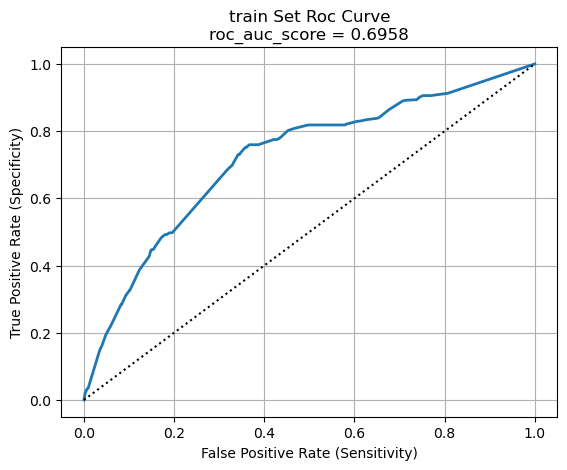


Check Precision-Recall Curve and Average Precision Score


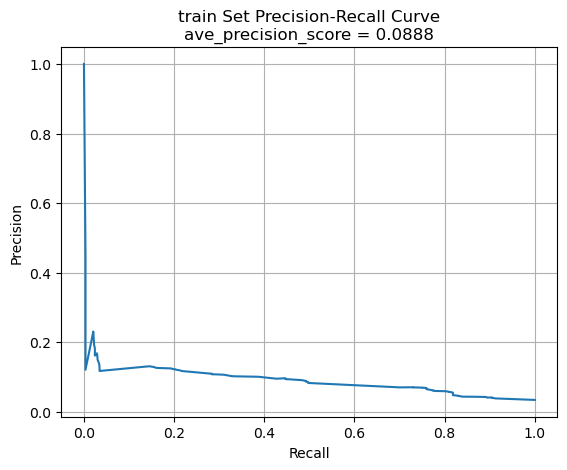

,stage,accuracy,precision,recall,cv_mean_accuracy,cv_mean_precision,cv_mean_recall,cv_mean_f1,roc_auc_score
0,train,0.6444,0.06944,0.750865,0.6916,0.0587,0.526,0.1054,0.6958


In [10]:
eval_train_results = bin_class_utils.eval_class(train_cap_x_df, train_y_df, best_model, "train", CVS_SCORING_LIST)
eval_train_results

#### 5. Evaluate hyperparameter-tuned estimator on validation set

In [11]:
validation_df = general_utils.read_csv(VALIDATION_FILE_PATH)


Read CSV file ../data/validation_df.csv into DataFrame:
df.head(): 


,uid,task_id,adv_id,creat_type_cd,adv_prim_id,dev_id,inter_type_cd,slot_id,spread_app_id,tags,...,device_price,up_life_duration,up_membership_grade,membership_life_duration,consume_purchase,communication_onlinerate,communication_avgonline_30d,indu_name,pt_d,label
0,1451378,2082,3033,7,154,56,5,11,31,40,...,4,20,-1,-1,7,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,17,5,0
1,1619957,1225,4676,7,178,17,5,17,70,39,...,4,20,-1,-1,2,0^1^2^3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18...,13,36,6,0
2,1698084,2206,2822,7,177,56,5,14,31,40,...,5,20,1,-1,2,-1,-1,17,3,0
3,1983802,5103,2564,7,151,60,4,12,23,26,...,4,20,-1,-1,8,7^8^9^10^11^12^13^14^15^16^17^18^19^20^21^22^23,10,39,5,0
4,1537560,1098,1732,7,134,55,4,17,65,18,...,4,20,-1,-1,2,3^4^5^6^7^8^9^10^11^12^13^14^15^16^17^18^19^20...,12,14,1,0


df.shape: (167629, 36)


In [12]:
validation_df_sample = data_prepare_utils.sample_data(validation_df, SAMPLE_SIZE, SAMPLE_RANDOM_STATE)
del validation_df


Sample 0.05 fraction from DataFrame:
sample_df.shape: (8381, 36)


In [13]:
validation_cap_x_df, validation_y_df = validation_df_sample.drop(columns=TARGET_ATTR), validation_df_sample[[TARGET_ATTR]]
del validation_df_sample

Evaluate the trained estimator performance on validation set
Check accuracy score
validation set accuracy score: 0.6345304856222408

Check classification report
{'0': {'precision': 0.9761408824086347, 'recall': 0.6370489372219476, 'f1-score': 0.7709564046960293, 'support': 8092.0}, '1': {'precision': 0.052580645161290324, 'recall': 0.5640138408304498, 'f1-score': 0.09619356742401888, 'support': 289.0}, 'accuracy': 0.6345304856222408, 'macro avg': {'precision': 0.5143607637849625, 'recall': 0.6005313890261987, 'f1-score': 0.4335749860600241, 'support': 8381.0}, 'weighted avg': {'precision': 0.9442939776759677, 'recall': 0.6345304856222408, 'f1-score': 0.7476887206521668, 'support': 8381.0}}

Check confusion matrix
validation set confusion matrix: 
[[5155 2937]
 [ 126  163]]
True Positives =  5155
True Negatives =  163
False Positives(Type I error) =  2937
False Negatives(Type II error) =  126

Check cross validation score

accuracy scores: [0.80143113 0.68556086 0.75536993 0.77923628 0.

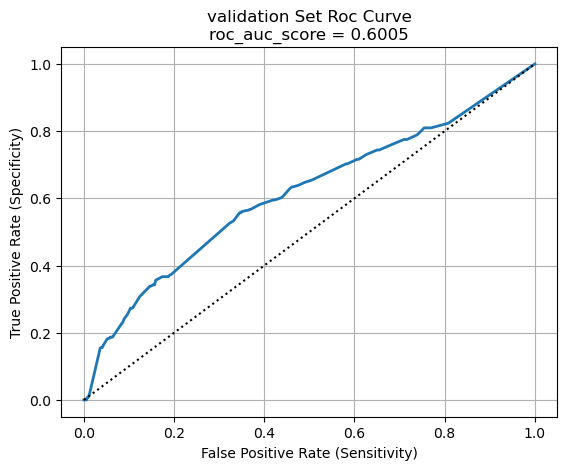


Check Precision-Recall Curve and Average Precision Score


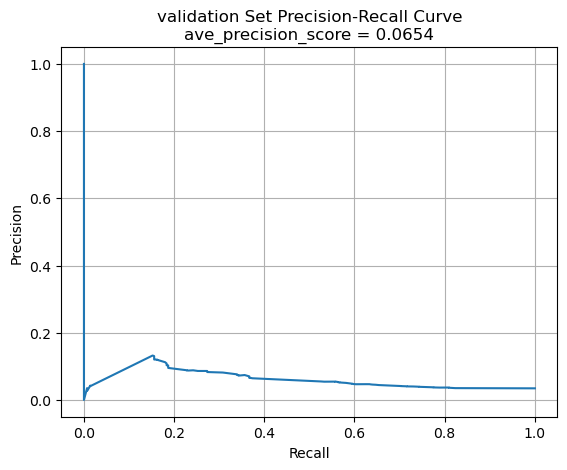

,stage,accuracy,precision,recall,cv_mean_accuracy,cv_mean_precision,cv_mean_recall,cv_mean_f1,roc_auc_score
0,validation,0.6345,0.052581,0.564014,0.7589,0.0509,0.3428,0.0883,0.6005


In [14]:
eval_validation_results = bin_class_utils.eval_class(validation_cap_x_df, validation_y_df, best_model, "validation", CVS_SCORING_LIST)
eval_validation_results

#### 6. Check out permutation feature importance

In [15]:
perm_results_df = bin_class_utils.check_out_permutation_importance(
    best_model, 
    train_cap_x_df, 
    train_y_df, 
    PERMUTATION_IMPORTANCE_RANDOM_STATE,
    PERMUTATION_SCORING_LIST
)
perm_results_df


Check out permutation importance:


,metric_name,feature_name,metric_mean,metric_std_dev
0,average_precision,slot_id,0.038678,0.001950
1,average_precision,his_app_size,0.022887,0.002139
2,average_precision,adv_id,0.017509,0.001054
3,average_precision,career,0.016810,0.001093
4,average_precision,app_second_class,0.014898,0.001127
5,average_precision,age,0.009323,0.001208
6,average_precision,adv_prim_id,0.009170,0.001307
7,average_precision,net_type,0.007125,0.000711
8,average_precision,indu_name,0.005902,0.000460
9,average_precision,device_price,0.004858,0.000636


#### 7. Check for false discoveries


**************************************************
means of the distributions:
                          ave_precision_score
distribution                                 
bootstrap_sample                     0.063087
randomized_target_sample             0.034132


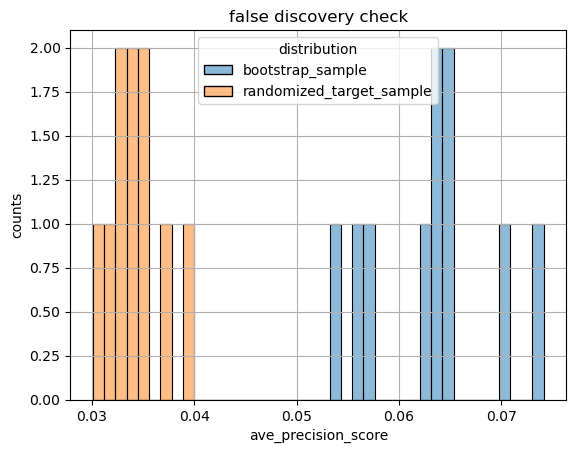


**************************************************
means of the distributions:
                          roc_auc_score
distribution                           
bootstrap_sample               0.606948
randomized_target_sample       0.483930


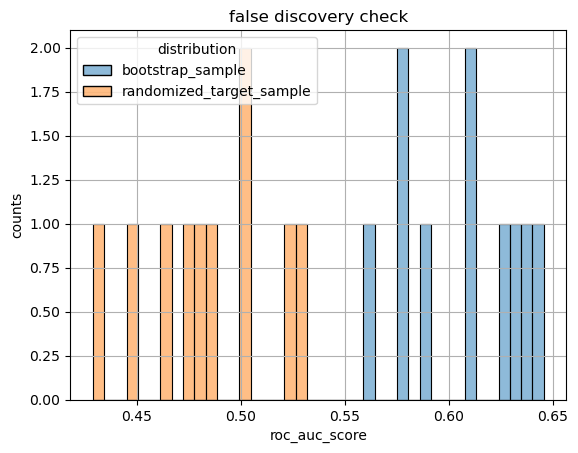

In [16]:
bin_class_utils.avoiding_false_discoveries_class_helper(
    best_model, 
    train_cap_x_df, 
    train_y_df, 
    validation_cap_x_df,
    validation_y_df, 
    num_samples=BS_SAMPLE_NUM
)

#### 8. Tune classification threshold for classification - assess threshold list

In [17]:
thresholds = np.arange(0, 1.1, 0.1)

bin_class_utils.print_classification_metrics_at_thresholds(
    validation_cap_x_df, 
    validation_y_df,
    best_model,  
    thresholds
)


Classification Report at Threshold 0.00:

              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      8092
           1     0.0345    1.0000    0.0667       289

    accuracy                         0.0345      8381
   macro avg     0.0172    0.5000    0.0333      8381
weighted avg     0.0012    0.0345    0.0023      8381


Classification Report at Threshold 0.10:

              precision    recall  f1-score   support

           0     0.9787    0.0510    0.0970      8092
           1     0.0352    0.9689    0.0679       289

    accuracy                         0.0827      8381
   macro avg     0.5069    0.5099    0.0825      8381
weighted avg     0.9461    0.0827    0.0960      8381

Classification Report at Threshold 0.20:

              precision    recall  f1-score   support

           0     0.9777    0.0596    0.1123      8092
           1     0.0352    0.9619    0.0680       289

    accuracy                         0.0907      8381


/Users/leon/miniconda3/envs/ctr_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/leon/miniconda3/envs/ctr_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/leon/miniconda3/envs/ctr_venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

              precision    recall  f1-score   support

           0     0.9669    0.7258    0.8292      8092
           1     0.0381    0.3045    0.0678       289

    accuracy                         0.7113      8381
   macro avg     0.5025    0.5151    0.4485      8381
weighted avg     0.9349    0.7113    0.8029      8381


Classification Report at Threshold 0.60:

              precision    recall  f1-score   support

           0     0.9662    0.9472    0.9566      8092
           1     0.0469    0.0727    0.0570       289

    accuracy                         0.9171      8381
   macro avg     0.5065    0.5099    0.5068      8381
weighted avg     0.9345    0.9171    0.9256      8381


Classification Report at Threshold 0.70:
              precision    recall  f1-score   support

           0     0.9659    0.9734    0.9697      8092
           1     0.0487    0.0381    0.0427       289

    accuracy                         0.9412      8381
   macro avg     0.5073    0.5057    0.5062

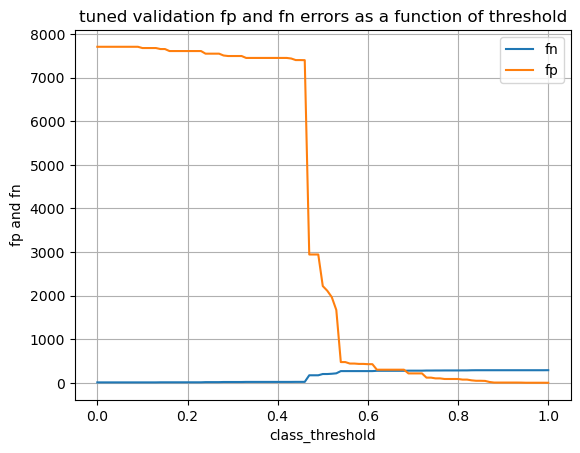

In [18]:
bin_class_utils.plot_errors_to_threshold(
    best_model, 
    validation_cap_x_df, 
    validation_y_df, 
    'tuned validation'
)

#### 9. Higher resolution scan to get the best classification threshold

In [19]:
temp_best_threshold = 0.80

In [20]:
start = temp_best_threshold - 0.05
stop = temp_best_threshold + 0.06
step_size = 0.01

narrow_thresholds = np.arange(start, stop, step_size)
bin_class_utils.print_classification_metrics_at_thresholds(
    validation_cap_x_df, 
    validation_y_df,
    best_model,
    narrow_thresholds
)


Classification Report at Threshold 0.75:

              precision    recall  f1-score   support

           0     0.9659    0.9875    0.9766      8092
           1     0.0648    0.0242    0.0353       289

    accuracy                         0.9543      8381
   macro avg     0.5154    0.5059    0.5059      8381
weighted avg     0.9348    0.9543    0.9441      8381


Classification Report at Threshold 0.76:

              precision    recall  f1-score   support

           0     0.9659    0.9875    0.9766      8092
           1     0.0648    0.0242    0.0353       289

    accuracy                         0.9543      8381
   macro avg     0.5154    0.5059    0.5059      8381
weighted avg     0.9348    0.9543    0.9441      8381


Classification Report at Threshold 0.77:

              precision    recall  f1-score   support

           0     0.9659    0.9892    0.9774      8092
           1     0.0645    0.0208    0.0314       289

    accuracy                         0.9559      8381

In [21]:
best_threshold = 0.78

#### 10. Evaluate the best classification threshold on validation set

Evaluate the trained estimator performance on best validation set
Check accuracy score
best validation set accuracy score: 0.955852523565207

Check classification report
{'0': {'precision': 0.965854247104247, 'recall': 0.9892486406327237, 'f1-score': 0.9774114774114774, 'support': 8092.0}, '1': {'precision': 0.06451612903225806, 'recall': 0.020761245674740483, 'f1-score': 0.031413612565445025, 'support': 289.0}, 'accuracy': 0.955852523565207, 'macro avg': {'precision': 0.5151851880682525, 'recall': 0.5050049431537321, 'f1-score': 0.5044125449884612, 'support': 8381.0}, 'weighted avg': {'precision': 0.9347736223431441, 'recall': 0.955852523565207, 'f1-score': 0.9447908613823038, 'support': 8381.0}}

Check confusion matrix
best validation set confusion matrix: 
[[8005   87]
 [ 283    6]]
True Positives =  8005
True Negatives =  6
False Positives(Type I error) =  87
False Negatives(Type II error) =  283

Check cross validation score

accuracy scores: [0.80143113 0.68556086 0.75536993 0.77

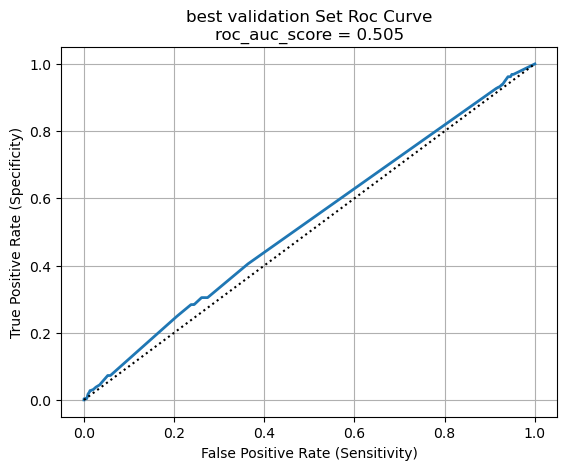


Check Precision-Recall Curve and Average Precision Score


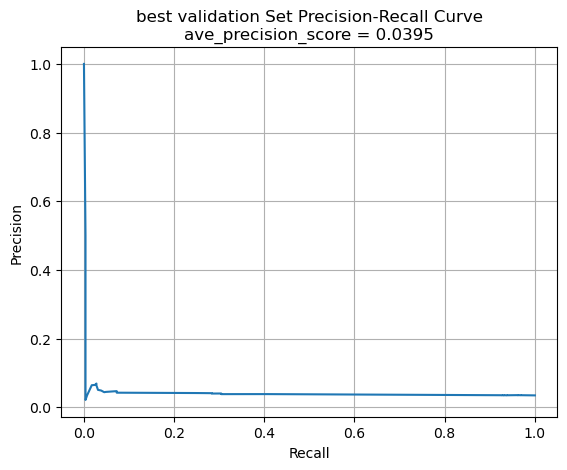

,stage,accuracy,precision,recall,cv_mean_accuracy,cv_mean_precision,cv_mean_recall,cv_mean_f1,roc_auc_score
0,best validation,0.9559,0.064516,0.020761,0.7589,0.0509,0.3428,0.0883,0.505


In [22]:
eval_best_validation_results = bin_class_utils.eval_class(
    validation_cap_x_df,
    validation_y_df,
    best_model,
    "best validation",
    CVS_SCORING_LIST,
    best_threshold
)
eval_best_validation_results

In [23]:
compare_df = pd.concat([eval_train_results, eval_validation_results, eval_best_validation_results], axis=0)
compare_df

,stage,accuracy,precision,recall,cv_mean_accuracy,cv_mean_precision,cv_mean_recall,cv_mean_f1,roc_auc_score
0,train,0.6444,0.069440,0.750865,0.6916,0.0587,0.5260,0.1054,0.6958
0,validation,0.6345,0.052581,0.564014,0.7589,0.0509,0.3428,0.0883,0.6005
0,best validation,0.9559,0.064516,0.020761,0.7589,0.0509,0.3428,0.0883,0.5050


#### 11. Save the best model with pickle

In [24]:
pickle.dump(best_model, open(ESTIMATOR_NAME + '.pkl', 'wb'))

In [25]:
end_time = time.time()
print(f'Script run time: {(end_time - start_time)/60} minutes')

Script run time: 1.733976995944977 minutes
